# A Case Study for Cyclistic, Chicago based Bike-Share Company 

## Analyzing User Behavior to Boost Annual Memberships

Cyclistic is a fictional bike-share program that features more than 5,800 bicycles and 600 docking stations. 

The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members. 

But first, Cyclistic executives must approve our recommendations, so they must be backed up with compelling data insights and professional data visualizations.

I will use Cyclistic’s historical trip data to analyze and identify trends.

[Dataset link](https://divvy-tripdata.s3.amazonaws.com/index.html)

The data has been made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement)

Variables:

trip_id: ID attached to each trip taken </br>
starttime: day and time trip started, in CST </br>
stoptime: day and time trip ended, in CST </br>
bikeid: ID attached to each bike </br>
tripduration: time of trip in seconds </br> 
from_station_name: name of station where trip originated </br>
to_station_name: name of station where trip terminated </br> 
from_station_id: ID of station where trip originated </br>
to_station_id: ID of station where trip terminated </br>
usertype: "Customer" is a rider who purchased a 24-Hour Pass; "Subscriber" is a rider who purchased an Annual Membership </br>
gender: gender of rider </br> 
birthyear: birth year of rider </br>

Gender and birthday are only available for Subscribers

"Customer" is a rider who purchased a 24-Hour Pass; "Subscriber" is a rider who purchased an Annual Membership

### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Importing data

In [2]:
csv_files = [
    'Divvy_Trips_Q1Q2.csv',
    'Divvy_Trips_Q3-07.csv',
    'Divvy_Trips_Q3-0809.csv',
    'Divvy_Trips_Q4.csv'
]

In [3]:
dataframe = []

In [4]:
for file in csv_files:
    df = pd.read_csv(file)
    dataframe.append(df)
    
combined_df = pd.concat(dataframe)
combined_df.reset_index(drop=True, inplace=True)

In [5]:
combined_df.head(10)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2355134,6/30/2014 23:57,7/1/2014 0:07,2006,604,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,Male,1988.0
1,2355133,6/30/2014 23:56,7/1/2014 0:00,2217,263,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,Male,1992.0
2,2355130,6/30/2014 23:33,6/30/2014 23:35,2798,126,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,Male,1993.0
3,2355129,6/30/2014 23:26,7/1/2014 0:24,173,3481,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,Female,1988.0
4,2355128,6/30/2014 23:16,6/30/2014 23:26,173,638,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,Female,1988.0
5,2355127,6/30/2014 23:11,6/30/2014 23:17,2782,336,332,Halsted St & Diversey Pkwy,319,Greenview Ave & Diversey Pkwy,Subscriber,Male,1985.0
6,2355126,6/30/2014 23:08,6/30/2014 23:13,1152,304,174,Canal St & Madison St,44,State St & Randolph St,Subscriber,Male,1977.0
7,2355125,6/30/2014 23:07,6/30/2014 23:16,941,525,199,Wabash Ave & Grand Ave,24,Fairbanks Ct & Grand Ave,Subscriber,Male,1987.0
8,2355124,6/30/2014 23:07,6/30/2014 23:10,2316,203,288,Larrabee St & Armitage Ave,94,Clark St & Armitage Ave,Customer,NaN,NaN
9,2355123,6/30/2014 23:06,6/30/2014 23:09,3022,167,238,Ravenswood Ave & Montrose Ave,316,Damen Ave & Sunnyside Ave,Subscriber,Male,1954.0


### Number of subscribers by birth year

In [6]:
subscriber_data = combined_df[combined_df['usertype'] == 'Subscriber']
subscriber_count_by_birthyear = subscriber_data['birthyear'].value_counts().sort_index()
subscriber_count_by_birthyear = subscriber_count_by_birthyear.dropna()
subscriber_data.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2355134,6/30/2014 23:57,7/1/2014 0:07,2006,604,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,Male,1988.0
1,2355133,6/30/2014 23:56,7/1/2014 0:00,2217,263,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,Male,1992.0
2,2355130,6/30/2014 23:33,6/30/2014 23:35,2798,126,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,Male,1993.0
3,2355129,6/30/2014 23:26,7/1/2014 0:24,173,3481,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,Female,1988.0
4,2355128,6/30/2014 23:16,6/30/2014 23:26,173,638,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,Female,1988.0


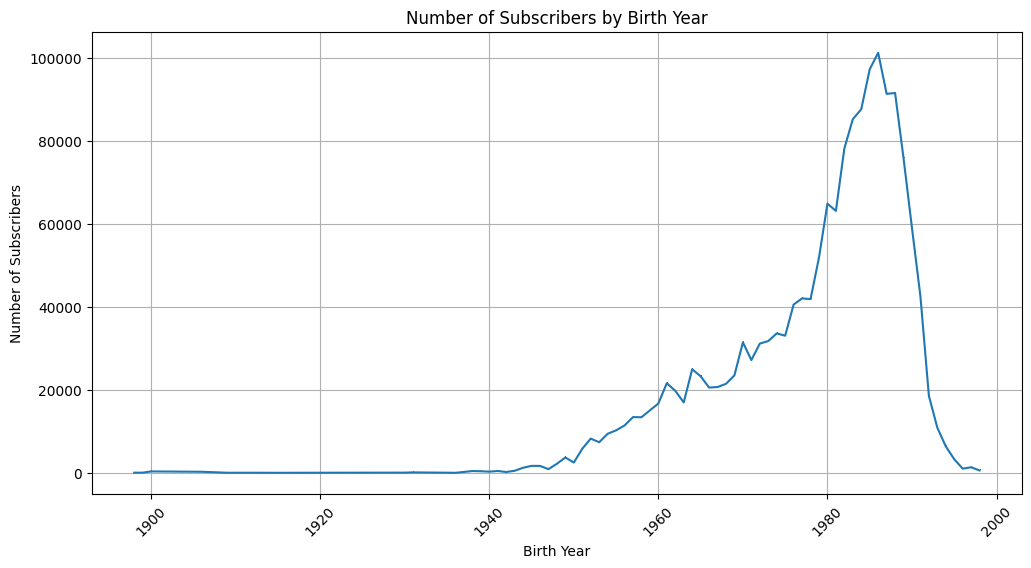

In [7]:
# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(subscriber_count_by_birthyear.index, subscriber_count_by_birthyear.values, marker=',', linestyle='-')
plt.title('Number of Subscribers by Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Many subscribers were born around the 1980s. If we had access to customers age data, we could efficiently target customers born within that particular time period. However, since we lack access to customer age data, this information becomes less valuable for targeted marketing purposes

### Data preprocessing

In [8]:
combined_df.isnull().sum()

trip_id                   0
starttime                 0
stoptime                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               791280
birthyear            791216
dtype: int64

In [9]:
combined_df.drop(columns=['trip_id', 
                          'bikeid', 
                          'from_station_id',  
                          'to_station_id', 
                          'gender',
                          'birthyear'], 
                 inplace = True)


In [10]:
combined_df.isnull().sum()

starttime            0
stoptime             0
tripduration         0
from_station_name    0
to_station_name      0
usertype             0
dtype: int64

In [11]:
combined_df.head()

,starttime,stoptime,tripduration,from_station_name,to_station_name,usertype
0,6/30/2014 23:57,7/1/2014 0:07,604,Lincoln Ave & Belmont Ave,Broadway & Cornelia Ave,Subscriber
1,6/30/2014 23:56,7/1/2014 0:00,263,Halsted St & Maxwell St,May St & Taylor St,Subscriber
2,6/30/2014 23:33,6/30/2014 23:35,126,Sheffield Ave & Webster Ave,Halsted St & Dickens Ave,Subscriber
3,6/30/2014 23:26,7/1/2014 0:24,3481,Peoria St & Jackson Blvd,State St & Wacker Dr,Subscriber
4,6/30/2014 23:16,6/30/2014 23:26,638,Loomis St & Lexington St,Peoria St & Jackson Blvd,Subscriber


In [12]:
print(combined_df.dtypes)

starttime            object
stoptime             object
tripduration          int64
from_station_name    object
to_station_name      object
usertype             object
dtype: object


In [13]:
# Converting starttime and stoptime datatype to datetime
combined_df['starttime'] = pd.to_datetime(combined_df['starttime'])
combined_df['stoptime'] = pd.to_datetime(combined_df['stoptime'])
combined_df.head()

,starttime,stoptime,tripduration,from_station_name,to_station_name,usertype
0,2014-06-30 23:57:00,2014-07-01 00:07:00,604,Lincoln Ave & Belmont Ave,Broadway & Cornelia Ave,Subscriber
1,2014-06-30 23:56:00,2014-07-01 00:00:00,263,Halsted St & Maxwell St,May St & Taylor St,Subscriber
2,2014-06-30 23:33:00,2014-06-30 23:35:00,126,Sheffield Ave & Webster Ave,Halsted St & Dickens Ave,Subscriber
3,2014-06-30 23:26:00,2014-07-01 00:24:00,3481,Peoria St & Jackson Blvd,State St & Wacker Dr,Subscriber
4,2014-06-30 23:16:00,2014-06-30 23:26:00,638,Loomis St & Lexington St,Peoria St & Jackson Blvd,Subscriber


In [14]:
print(combined_df.dtypes)

starttime            datetime64[ns]
stoptime             datetime64[ns]
tripduration                  int64
from_station_name            object
to_station_name              object
usertype                     object
dtype: object


In [15]:
# Adding trip_duration_min column
combined_df['trip_duration_min'] = combined_df['stoptime'] - combined_df['starttime']
combined_df['trip_duration_min'] = combined_df['trip_duration_min'].dt.total_seconds() / 60

# Renaming tripduration column to trip_duration_sec
combined_df.rename(columns={'tripduration': 'trip_duration_sec'}, inplace=True)
combined_df.head()

,starttime,stoptime,trip_duration_sec,from_station_name,to_station_name,usertype,trip_duration_min
0,2014-06-30 23:57:00,2014-07-01 00:07:00,604,Lincoln Ave & Belmont Ave,Broadway & Cornelia Ave,Subscriber,10.0
1,2014-06-30 23:56:00,2014-07-01 00:00:00,263,Halsted St & Maxwell St,May St & Taylor St,Subscriber,4.0
2,2014-06-30 23:33:00,2014-06-30 23:35:00,126,Sheffield Ave & Webster Ave,Halsted St & Dickens Ave,Subscriber,2.0
3,2014-06-30 23:26:00,2014-07-01 00:24:00,3481,Peoria St & Jackson Blvd,State St & Wacker Dr,Subscriber,58.0
4,2014-06-30 23:16:00,2014-06-30 23:26:00,638,Loomis St & Lexington St,Peoria St & Jackson Blvd,Subscriber,10.0


### Total number of rides taken by Subscribers and Customers in a year

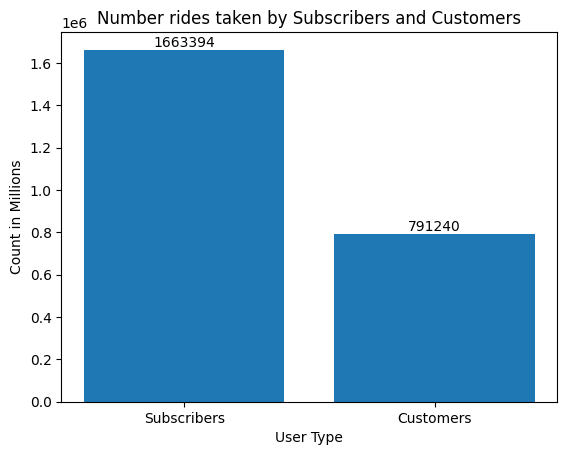

In [16]:
user_counts = combined_df['usertype'].value_counts()
subscriber_count = user_counts['Subscriber']
customer_count = user_counts['Customer']

plt.bar(['Subscribers', 'Customers'], [subscriber_count, customer_count])
plt.xlabel('User Type')
plt.ylabel('Count in Millions')
plt.title('Number rides taken by Subscribers and Customers')
plt.text(0, subscriber_count, f'{subscriber_count}', ha='center', va='bottom')
plt.text(1, customer_count, f'{customer_count}', ha='center', va='bottom')
plt.show()

### What percentage of rides in a year were taken by customers and what percentage were taken by subscribers?


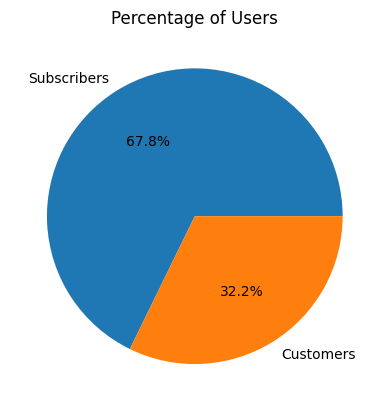

In [17]:
user_counts = [subscriber_count, customer_count]
user_types = ['Subscribers', 'Customers']

plt.pie(user_counts, labels=user_types, autopct='%1.1f%%')
plt.title('Percentage of Users')
plt.show()

Approximately 68% of the total rides are taken by Subscribers while approximately 32% are taken by Customers. 

In [18]:
# Adding ride_day_of_week column
combined_df['ride_day_of_week'] = combined_df['starttime'].dt.dayofweek
day_of_week_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
combined_df['ride_day_of_week'] = combined_df['ride_day_of_week'].map(day_of_week_mapping)
combined_df.head()

,starttime,stoptime,trip_duration_sec,from_station_name,to_station_name,usertype,trip_duration_min,ride_day_of_week
0,2014-06-30 23:57:00,2014-07-01 00:07:00,604,Lincoln Ave & Belmont Ave,Broadway & Cornelia Ave,Subscriber,10.0,Monday
1,2014-06-30 23:56:00,2014-07-01 00:00:00,263,Halsted St & Maxwell St,May St & Taylor St,Subscriber,4.0,Monday
2,2014-06-30 23:33:00,2014-06-30 23:35:00,126,Sheffield Ave & Webster Ave,Halsted St & Dickens Ave,Subscriber,2.0,Monday
3,2014-06-30 23:26:00,2014-07-01 00:24:00,3481,Peoria St & Jackson Blvd,State St & Wacker Dr,Subscriber,58.0,Monday
4,2014-06-30 23:16:00,2014-06-30 23:26:00,638,Loomis St & Lexington St,Peoria St & Jackson Blvd,Subscriber,10.0,Monday


### Number of rides by user type for each day of the week

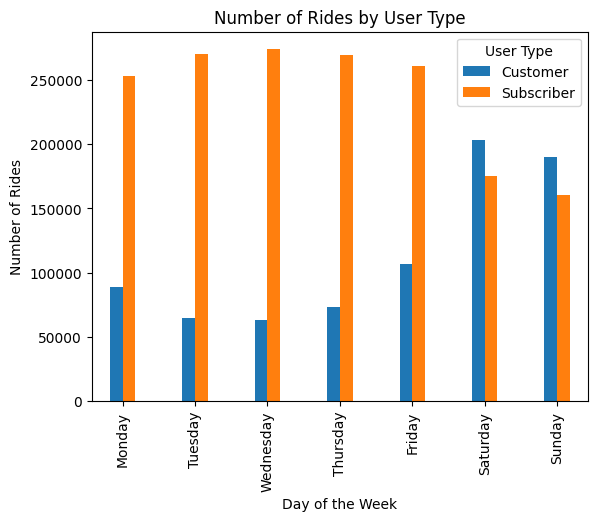

In [19]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
combined_df['ride_day_of_week'] = pd.Categorical(combined_df['ride_day_of_week'], categories=day_order, ordered=True)
ride_counts = combined_df.groupby(['ride_day_of_week', 'usertype']).size().unstack()
ride_counts.plot(kind='bar', width=0.35, position=0.5)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by User Type')
plt.legend(title='User Type')
plt.show()

Subscribers take more rides in the weekdays and number of rides taken by customers gradually inreases towards the weekend and customers usually dominate number of rides taken during weekends by a small margin


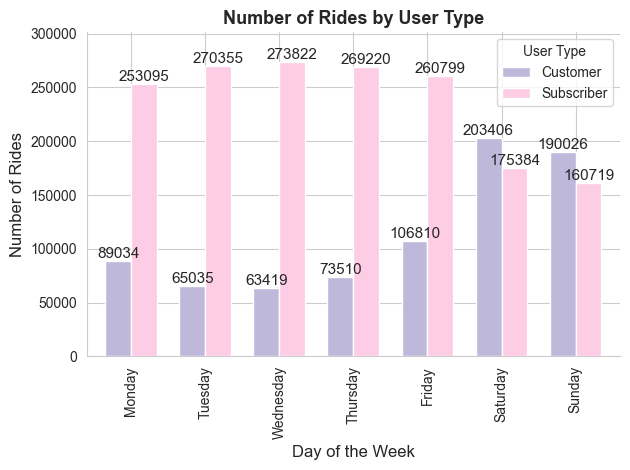

In [20]:
import seaborn as sns
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
combined_df['ride_day_of_week'] = pd.Categorical(combined_df['ride_day_of_week'], categories=day_order, ordered=True)
ride_counts = combined_df.groupby(['ride_day_of_week', 'usertype']).size().unstack()
colors = ["#beb9db", "#fdcce5"]

sns.set_style('whitegrid')
ax = ride_counts.plot(kind='bar', width=0.7, color=colors, edgecolor='white')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.title('Number of Rides by User Type', fontsize=13, fontweight='bold')
plt.legend(title='User Type', fontsize=10, title_fontsize=10)

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{y}', (x, y), ha='center', va='bottom', fontsize=11)

plt.ylim(top=max(ride_counts.max()) * 1.1)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

Avg number of rides taken by subscribers during weekdays is 265,458. </br>
Avg number of rides taken by subscribers during weekends is 168,051.

Avg number of rides taken by customers during weekdays is 79,561. </br>
Avg number of rides taken by customers during weekends is 196,716.

Number of rides taken by customers/casual riders almost triple during weekends.

### Number of rides by user type for each month

In [21]:
combined_df['month'] = combined_df['starttime'].dt.month
rides_by_month = combined_df.groupby(['month', 'usertype']).size().unstack()

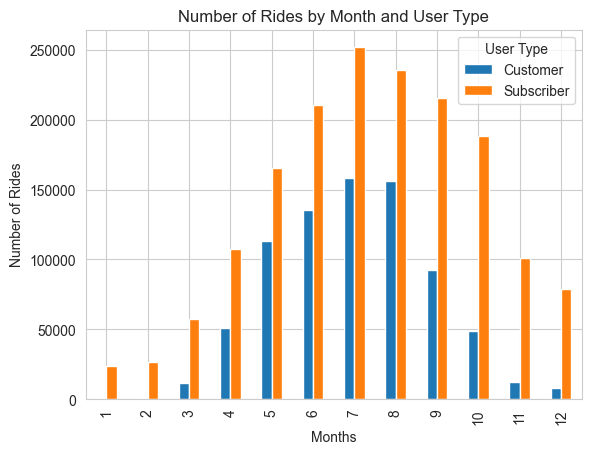

In [22]:
rides_by_month.plot(kind='bar', width=0.5, position=0.5)
plt.xlabel('Months')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Month and User Type')
plt.legend(title='User Type')
plt.show()

In terms of monthly trips, both customers and subscibers demonstrate similar trends, with a higher number of trips during the spring and summer seasons and fewer trips during winter. The disparity between customers and subscibers is minimal during the month of June, indicating a closer alignment in their patterns during the summer.

### Average Trip Duration for each user type per month

In [23]:
combined_df['month'] = combined_df['starttime'].dt.month
trip_duration_by_month = combined_df.groupby(['month', 'usertype'])['trip_duration_min'].mean()
print(trip_duration_by_month)

month  usertype  
1      Customer      22.828302
       Subscriber    10.622876
2      Customer      23.556110
       Subscriber    11.251785
3      Customer      28.519780
       Subscriber    11.206201
4      Customer      28.547727
       Subscriber    11.769319
5      Customer      29.233156
       Subscriber    12.485651
6      Customer      28.150112
       Subscriber    12.805053
7      Customer      28.429255
       Subscriber    12.697292
8      Customer      27.621310
       Subscriber    12.357672
9      Customer      26.434806
       Subscriber    11.899975
10     Customer      26.692685
       Subscriber    11.228573
11     Customer      25.222760
       Subscriber    10.368950
12     Customer      23.685139
       Subscriber    10.064202
Name: trip_duration_min, dtype: float64


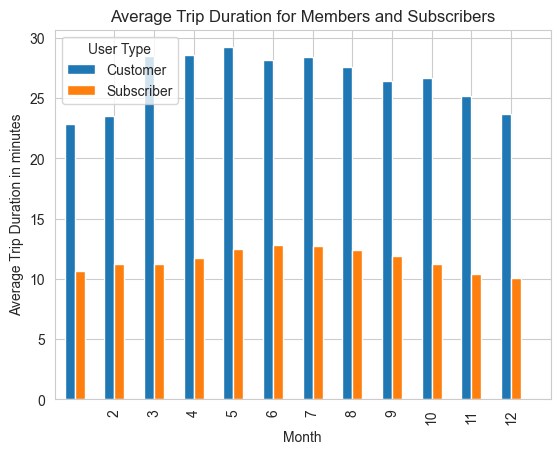

In [24]:
combined_df['month'] = combined_df['starttime'].dt.month
trip_duration_by_month = combined_df.groupby(['month', 'usertype'])['trip_duration_min'].mean()
trip_duration_by_month = trip_duration_by_month.unstack()
trip_duration_by_month.plot(kind='bar')
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Average Trip Duration in minutes')
plt.title('Average Trip Duration for Members and Subscribers')
plt.legend(title='User Type')
plt.show()

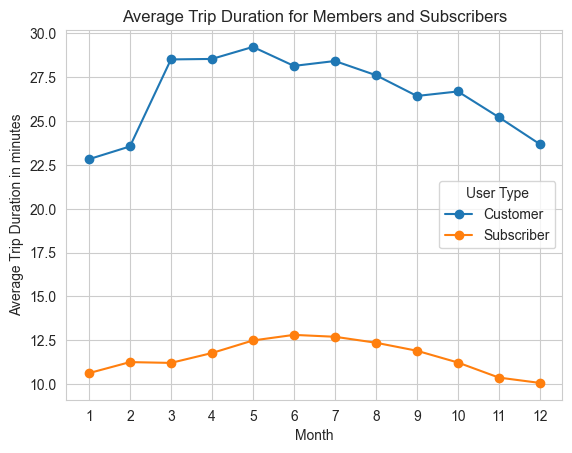

In [25]:
combined_df['month'] = combined_df['starttime'].dt.month
trip_duration_by_month = combined_df.groupby(['month', 'usertype'])['trip_duration_min'].mean()
trip_duration_by_month = trip_duration_by_month.unstack()
trip_duration_by_month.plot(kind='line', marker='o')
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Average Trip Duration in minutes')
plt.title('Average Trip Duration for Members and Subscribers')
plt.legend(title='User Type')
plt.show()

### Average Trip Duration for each user type

In [26]:
average_duration_customer = combined_df[combined_df['usertype'] == 'Customer']['trip_duration_min'].mean()
average_duration_subscriber = combined_df[combined_df['usertype'] == 'Subscriber']['trip_duration_min'].mean()
print("Average Trip Duration for Customer in minutes:", average_duration_customer)
print("Average Trip Duration for Subscribers in minutes:", average_duration_subscriber)

Average Trip Duration for Customer in minutes: 27.890985036145796
Average Trip Duration for Subscribers in minutes: 11.940940029842599


In [27]:
min_trip_duration_s = combined_df[combined_df["usertype"] == "Subscriber"]["trip_duration_min"].min()
max_trip_duration_s = combined_df[combined_df["usertype"] == "Subscriber"]["trip_duration_min"].max()

min_trip_duration_c = combined_df[combined_df["usertype"] == "Customer"]["trip_duration_min"].min()
max_trip_duration_c = combined_df[combined_df["usertype"] == "Customer"]["trip_duration_min"].max()

print(f"Shortest trip taken by a Subscriber is of {min_trip_duration_s} minutes")
print(f"Longest trip taken by a Subscriber is of {max_trip_duration_s} minutes")
print(f"Shortest trip taken by a Customer is of {min_trip_duration_c} minutes")
print(f"Longest trip taken by a Customer is of {max_trip_duration_c} minutes")

Shortest trip taken by a Subscriber is of 1.0 minutes
Longest trip taken by a Subscriber is of 1433.0 minutes
Shortest trip taken by a Customer is of 1.0 minutes
Longest trip taken by a Customer is of 1440.0 minutes


### Average Trip Duration for each user type for each day of the week

In [28]:
trip_duration_by_day = combined_df.groupby(['ride_day_of_week', 'usertype'])['trip_duration_min'].mean()
trip_duration_by_day = trip_duration_by_day.unstack()
print(trip_duration_by_day)

usertype           Customer  Subscriber
ride_day_of_week                       
Monday            27.532999   11.701017
Tuesday           26.429692   11.498186
Wednesday         26.058184   11.599123
Thursday          26.617630   11.609996
Friday            27.974675   11.870571
Saturday          28.659941   13.103077
Sunday            28.792955   13.046286


### Average Ride Count by hour for Members and Subscribers

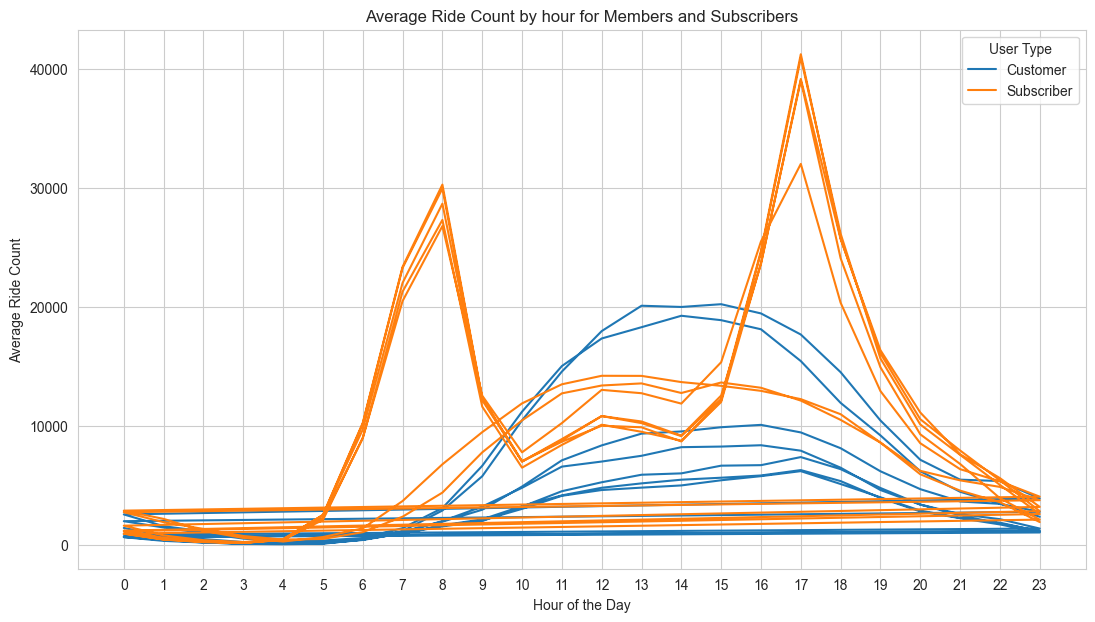

In [29]:
# Extracting the day of the week and hour from the start time
combined_df['day_of_week'] = combined_df['starttime'].dt.dayofweek
combined_df['hour'] = combined_df['starttime'].dt.hour
ride_count_by_hour = combined_df.groupby(['day_of_week', 'hour', 'usertype']).size().unstack()
plt.figure(figsize=(13, 7))
user_types = ['Customer', 'Subscriber']

for user_type in user_types:
    user_data = ride_count_by_hour[user_type]
    plt.plot(user_data.index.get_level_values('hour'), user_data, label=user_type)

plt.xlabel('Hour of the Day')
plt.ylabel('Average Ride Count')
plt.title('Average Ride Count by hour for Members and Subscribers')
plt.legend(title='User Type')
plt.xticks(range(24))
plt.show()

The average number of rides for subscribers experiences sharp increases around 8 am and 5 pm, suggesting that they likely use the bikes for their daily commutes to work. </br>
On the other hand, for customers, the average ride count gradually rises from 9 am to 3 pm, indicating that they may use the bikes for leisure activities or running errands.

### Top 10 most frequently used start stations

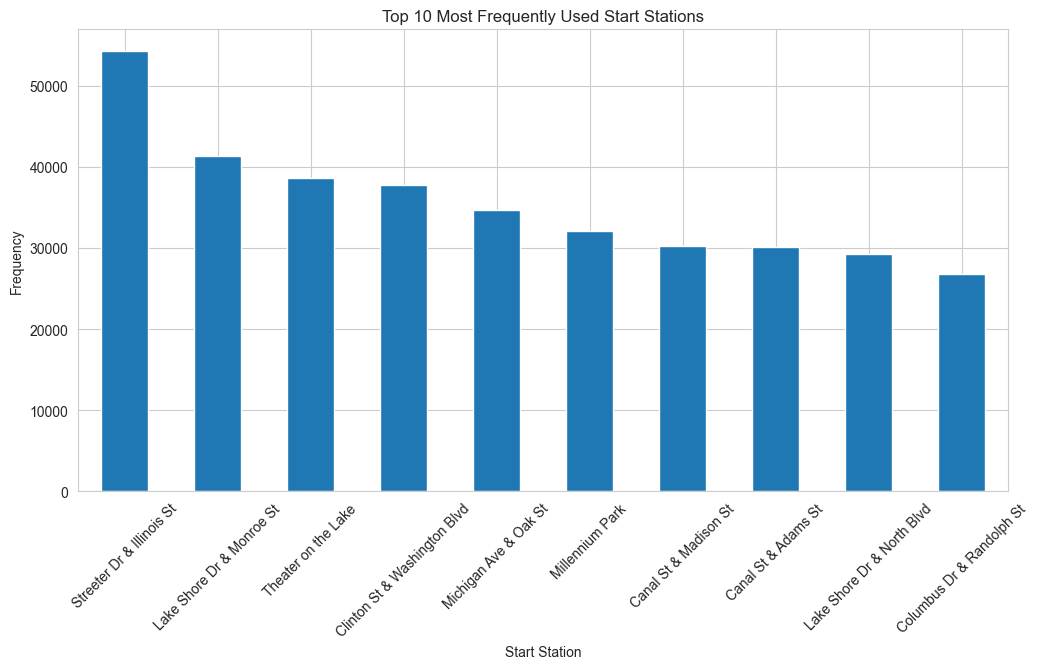

In [30]:
# Count the occurrences of each start station
start_station_counts = combined_df['from_station_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
start_station_counts.plot(kind='bar')
plt.title('Top 10 Most Frequently Used Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Top 10 most frequently used end stations

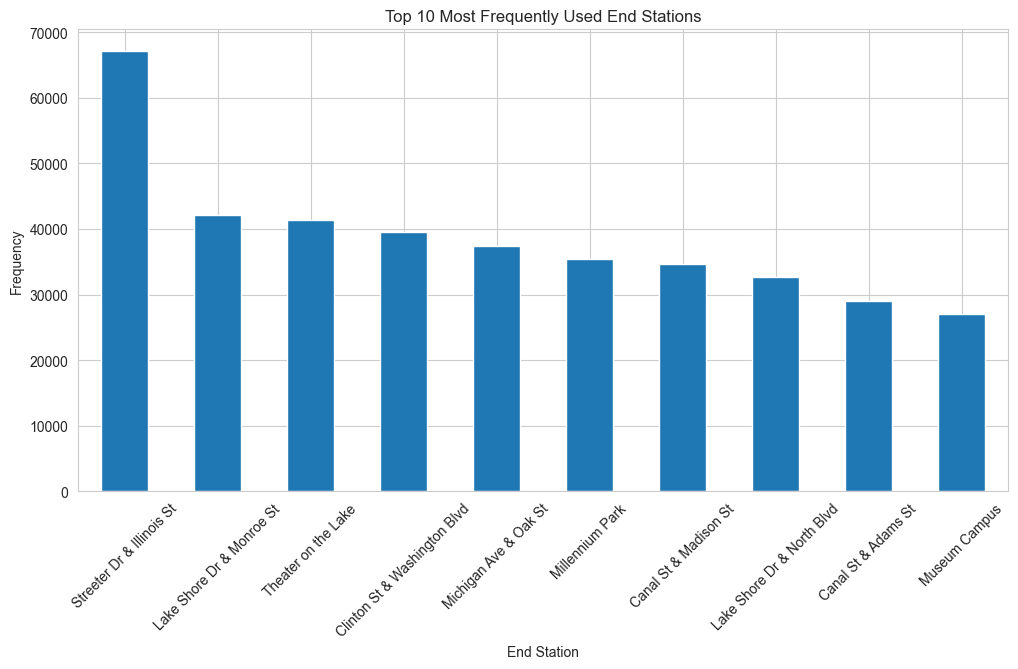

In [31]:
# Count the occurrences of each start station
end_station_counts = combined_df['to_station_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
end_station_counts.plot(kind='bar')
plt.title('Top 10 Most Frequently Used End Stations')
plt.xlabel('End Station')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()